In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data_names = ["example", "medium_size", "hcv"]

0    30
1    30
2    18
3    18
Name: candidates, dtype: int64
0    24
1    24
2    16
3    14
Name: candidates, dtype: int64
0    26
1    26
2    30
3    30
4    30
5    18
6    18
7    18
8    18
Name: candidates, dtype: int64
0    18
1    20
2    24
3    27
4    24
5    14
6    16
7    12
8    16
Name: candidates, dtype: int64


KeyError: 'candidates'

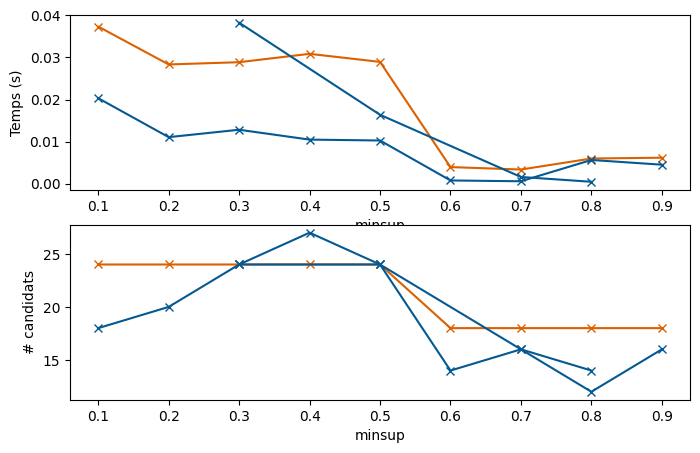

In [ ]:
import glob
import random

files = glob.glob("results/*")

percents = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
percents_2 = [0.3, 0.5, 0.7, 0.8]

data_names = set()
for file in files:
    if ".csv" in file:
        f_name = file.split("/")[-1].split(".")[0]
        if "test_" in file:
            data_names.add(f_name.replace("test_", ""))
        else:
            data_names.add(f_name.replace("Grite_", ""))

for name in data_names:
    figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))
    figure.suptitle(name)

    i = 0
    for filename in files:
        if name in filename:
            algo = filename.split("/")[-1].split("_")[0].split("/")[-1]
            if algo == "test":
                algo = "Grite + condition"
            else:
                algo = "Grite"
            if '.xlsx' in filename:
                df = pd.read_excel(filename)
            else:
                df = pd.read_csv(filename)
            color = "#045993" if algo == "Grite + condition" else "#DB6000"
            candidate_column = "patterns"
            x_axis = (
                percents if len(percents) == len(df[candidate_column]) else percents_2
            )
            try:

                axes[0].plot(x_axis, df["time"], label=algo, color=color, marker="x")
                axes[0].set_ylabel("Temps (s)")
                axes[0].set_xlabel("minsup")

                axes[1].plot(
                    x_axis, df[candidate_column], label=algo, color=color, marker="x"
                )
                axes[1].set_ylabel("# candidats")
                axes[1].set_xlabel("minsup")
                axes.grid()

                axes[0].title.set_text("Temps d'exécution")
                axes[1].title.set_text("Nombre de candidats générés")

            except:
                pass
    axes[0].grid()
    axes[1].grid()
    axes[0].legend()
    axes[1].legend()
    plt.legend()
    plt.show()
    bbox0 = axes[0].get_tightbbox(figure.canvas.get_renderer())
    bbox0_inches = bbox0.transformed(figure.dpi_scale_trans.inverted())
    figure.savefig(
        f"../images egc/time/grite_{name}.png", bbox_inches=bbox0_inches, dpi=300
    )

    # Save axes[1]
    bbox1 = axes[1].get_tightbbox(figure.canvas.get_renderer())
    bbox1_inches = bbox1.transformed(figure.dpi_scale_trans.inverted())
    figure.savefig(
        f"../images egc/candidats/grite_{name}.png",
        bbox_inches=bbox1_inches,
        dpi=300,
    )
    # break
    # figure.savefig(f"../images egc/img/{name}.png")

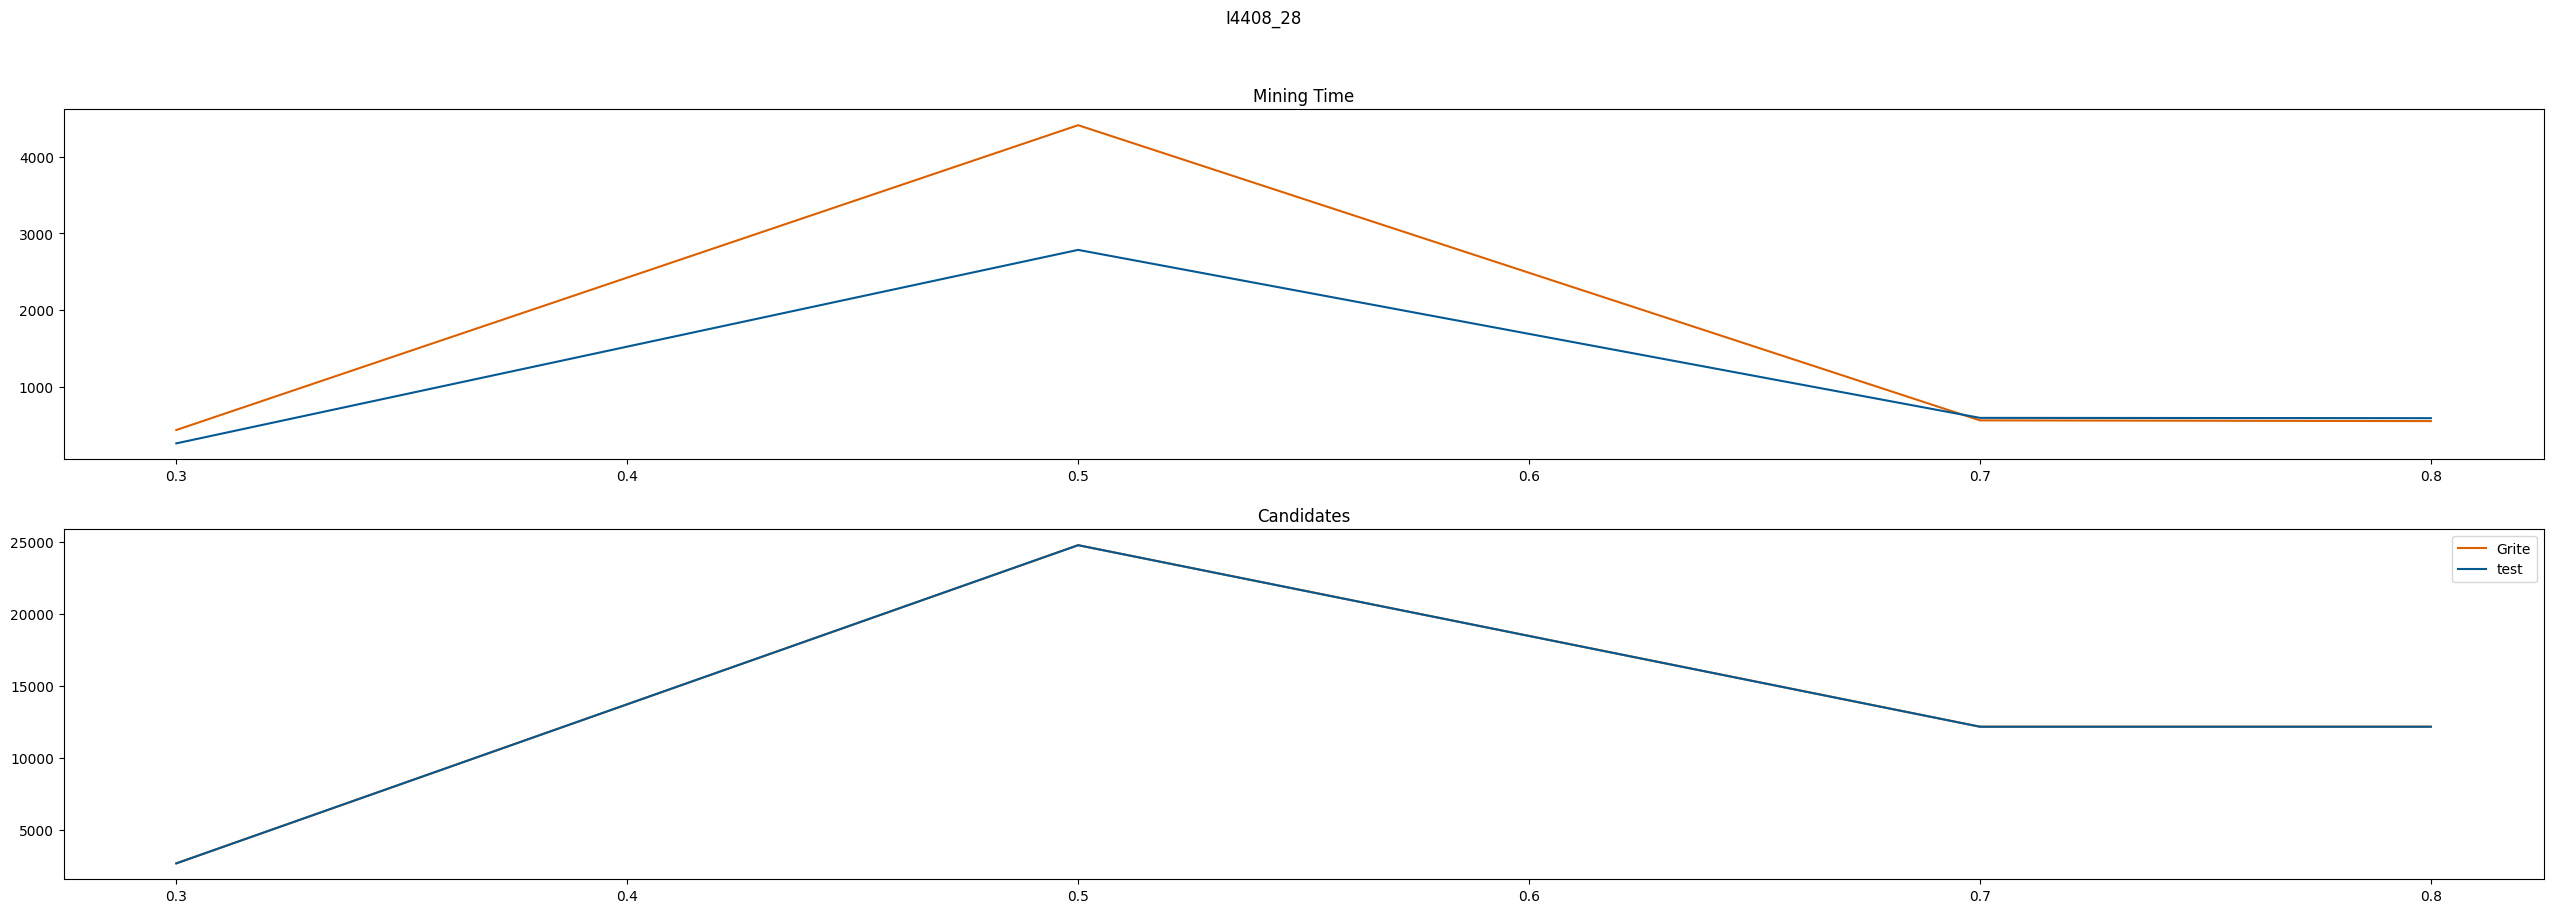

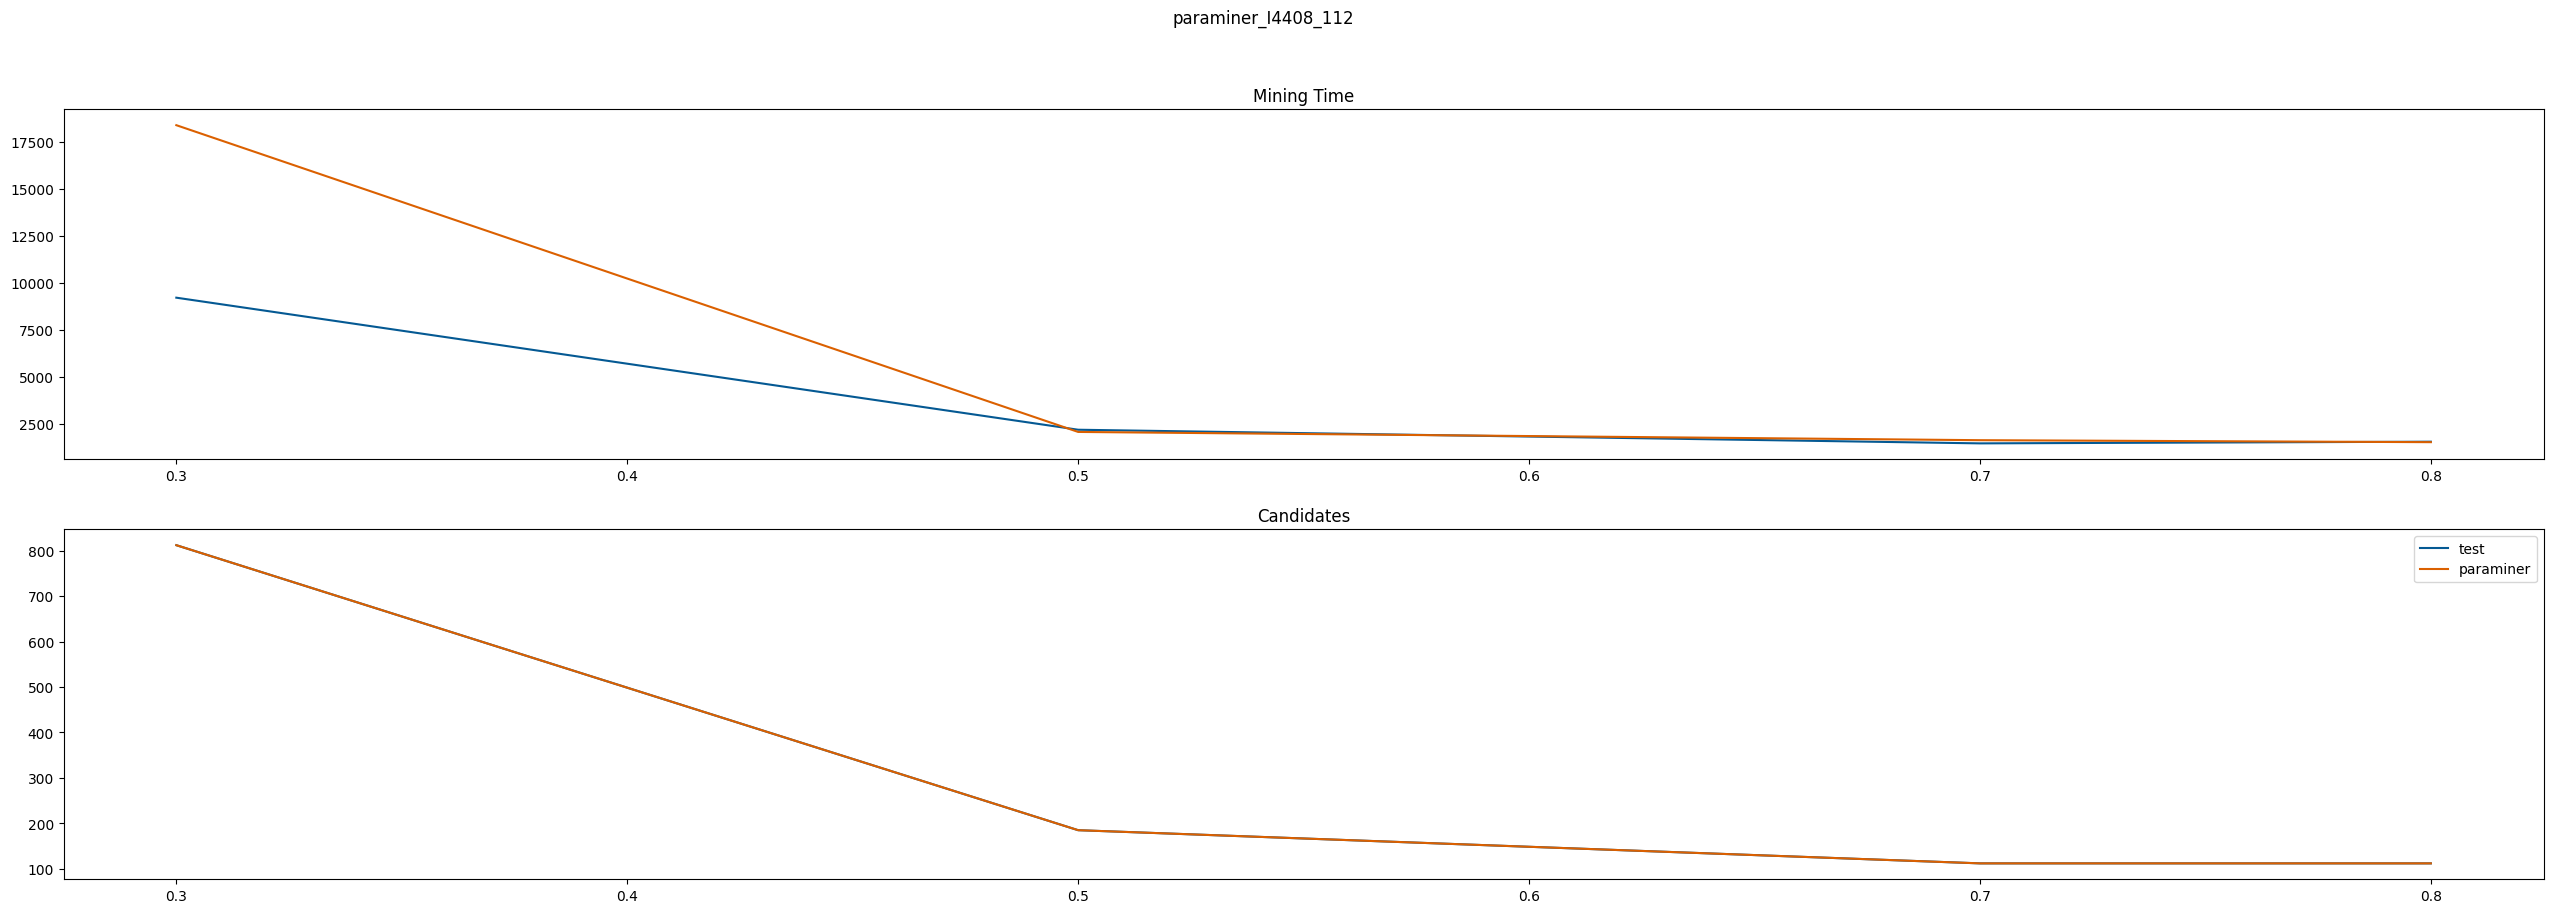

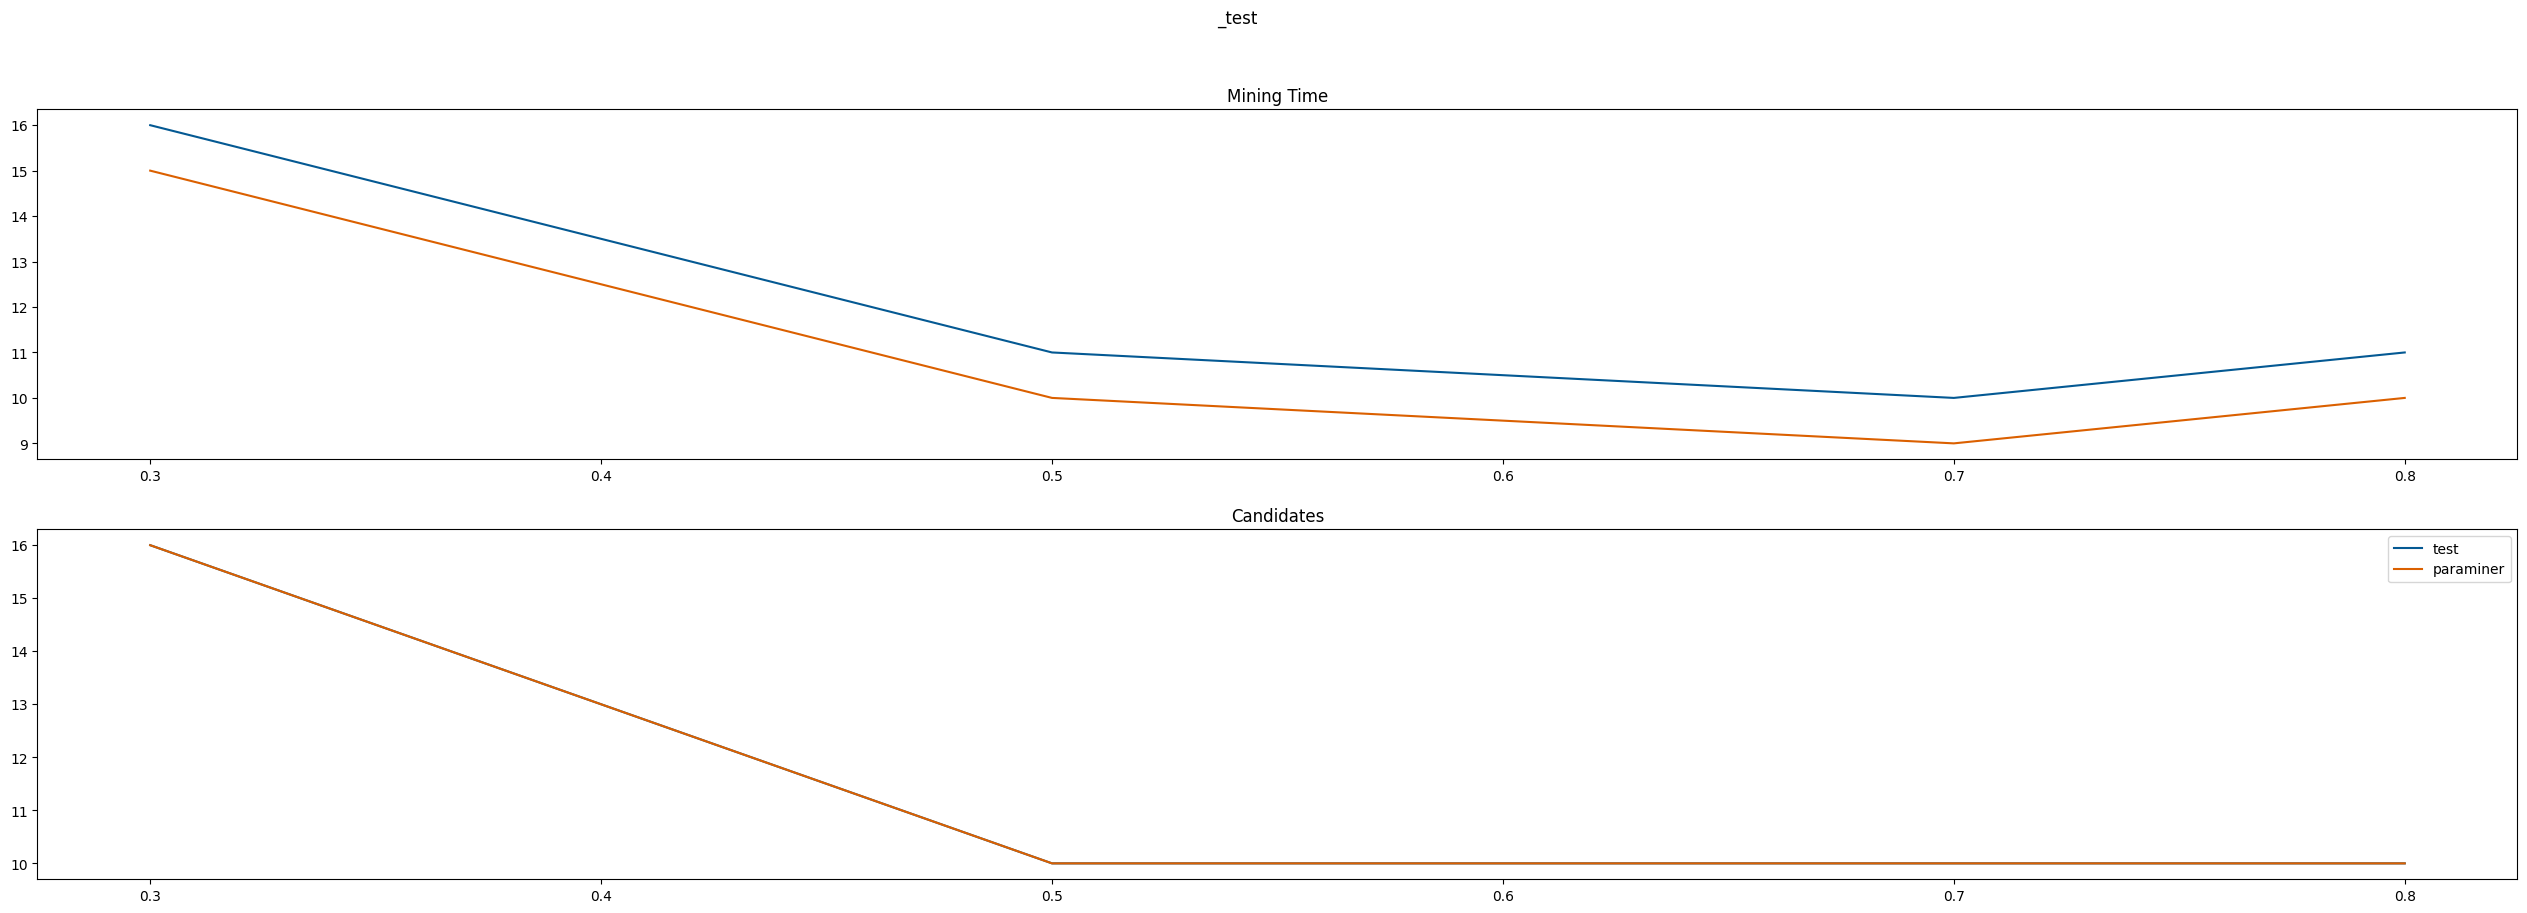

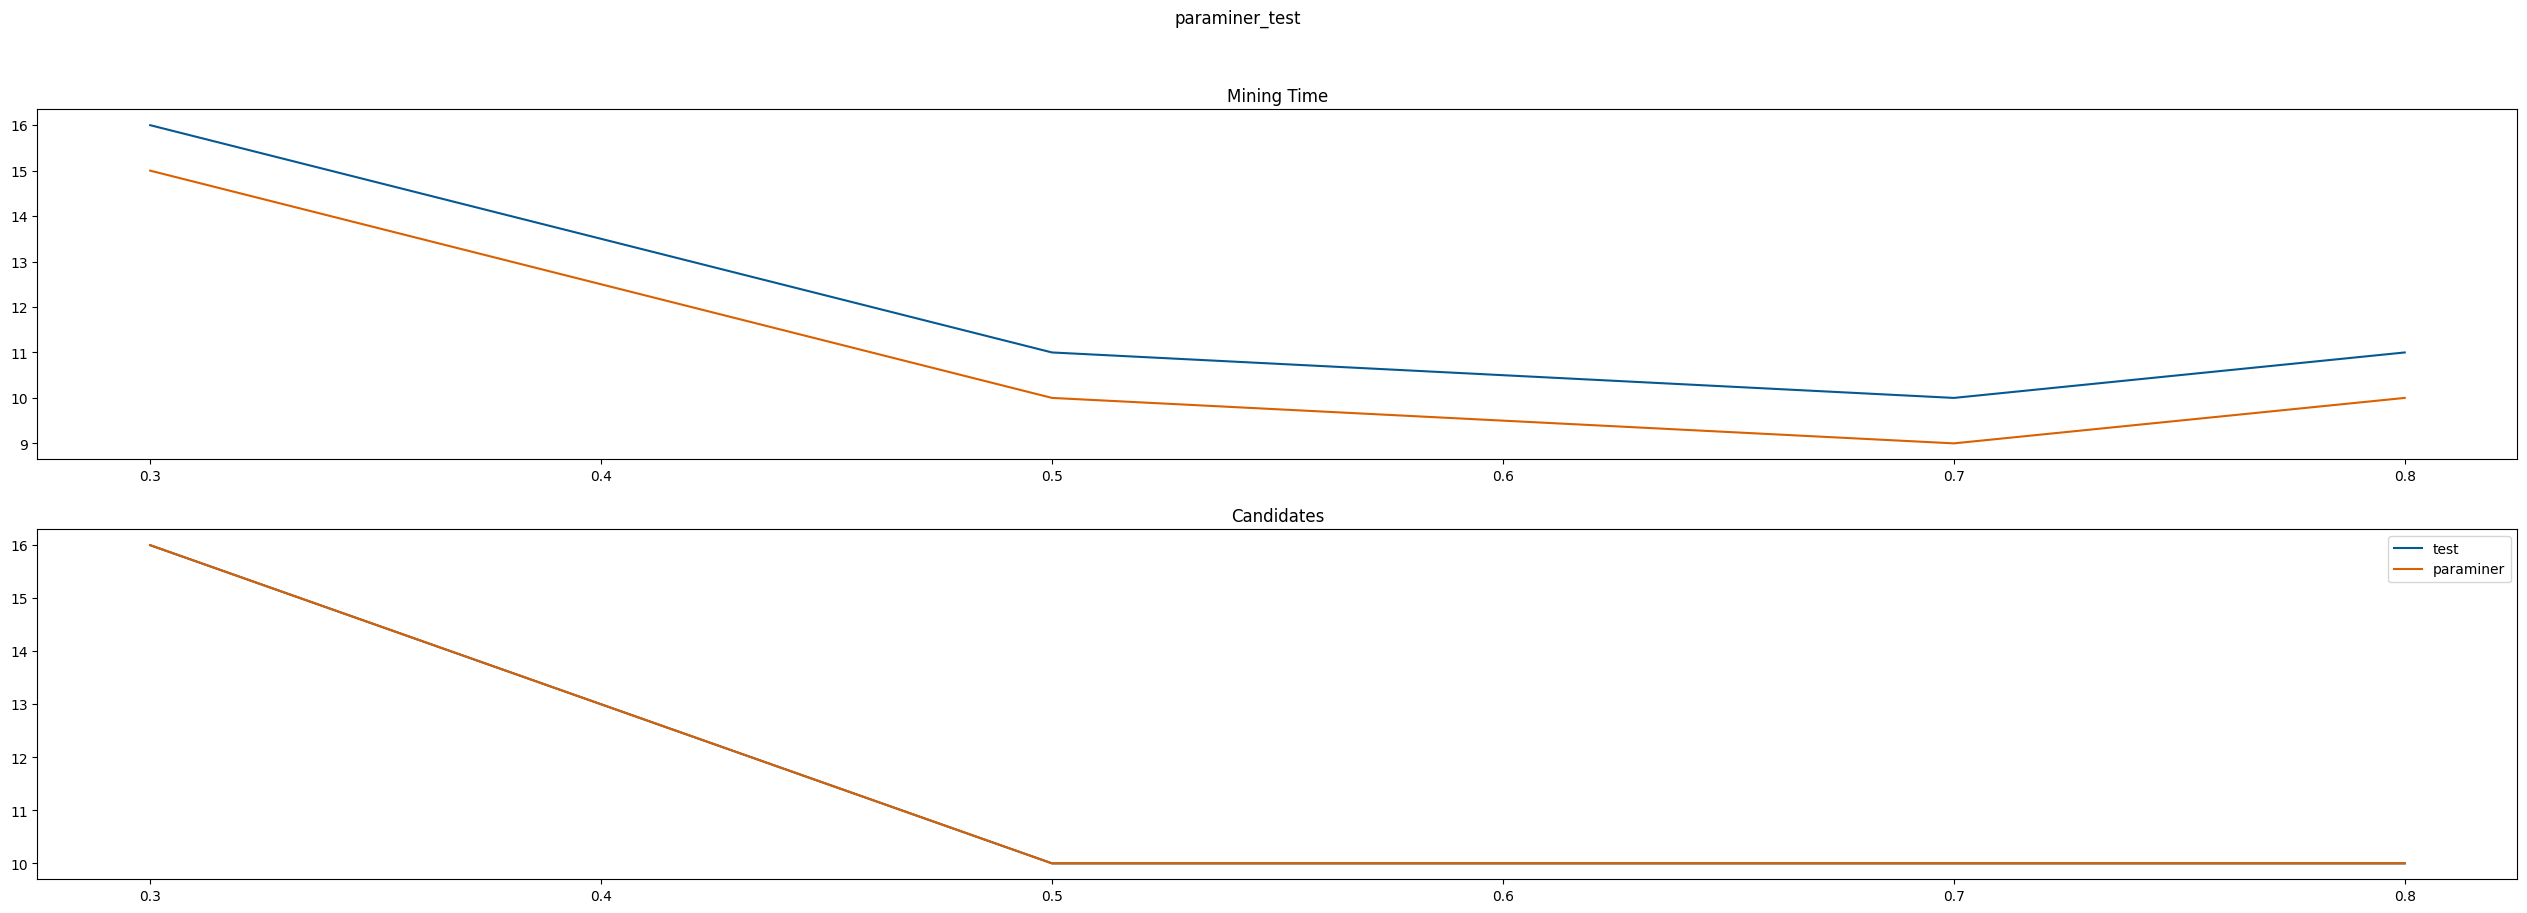

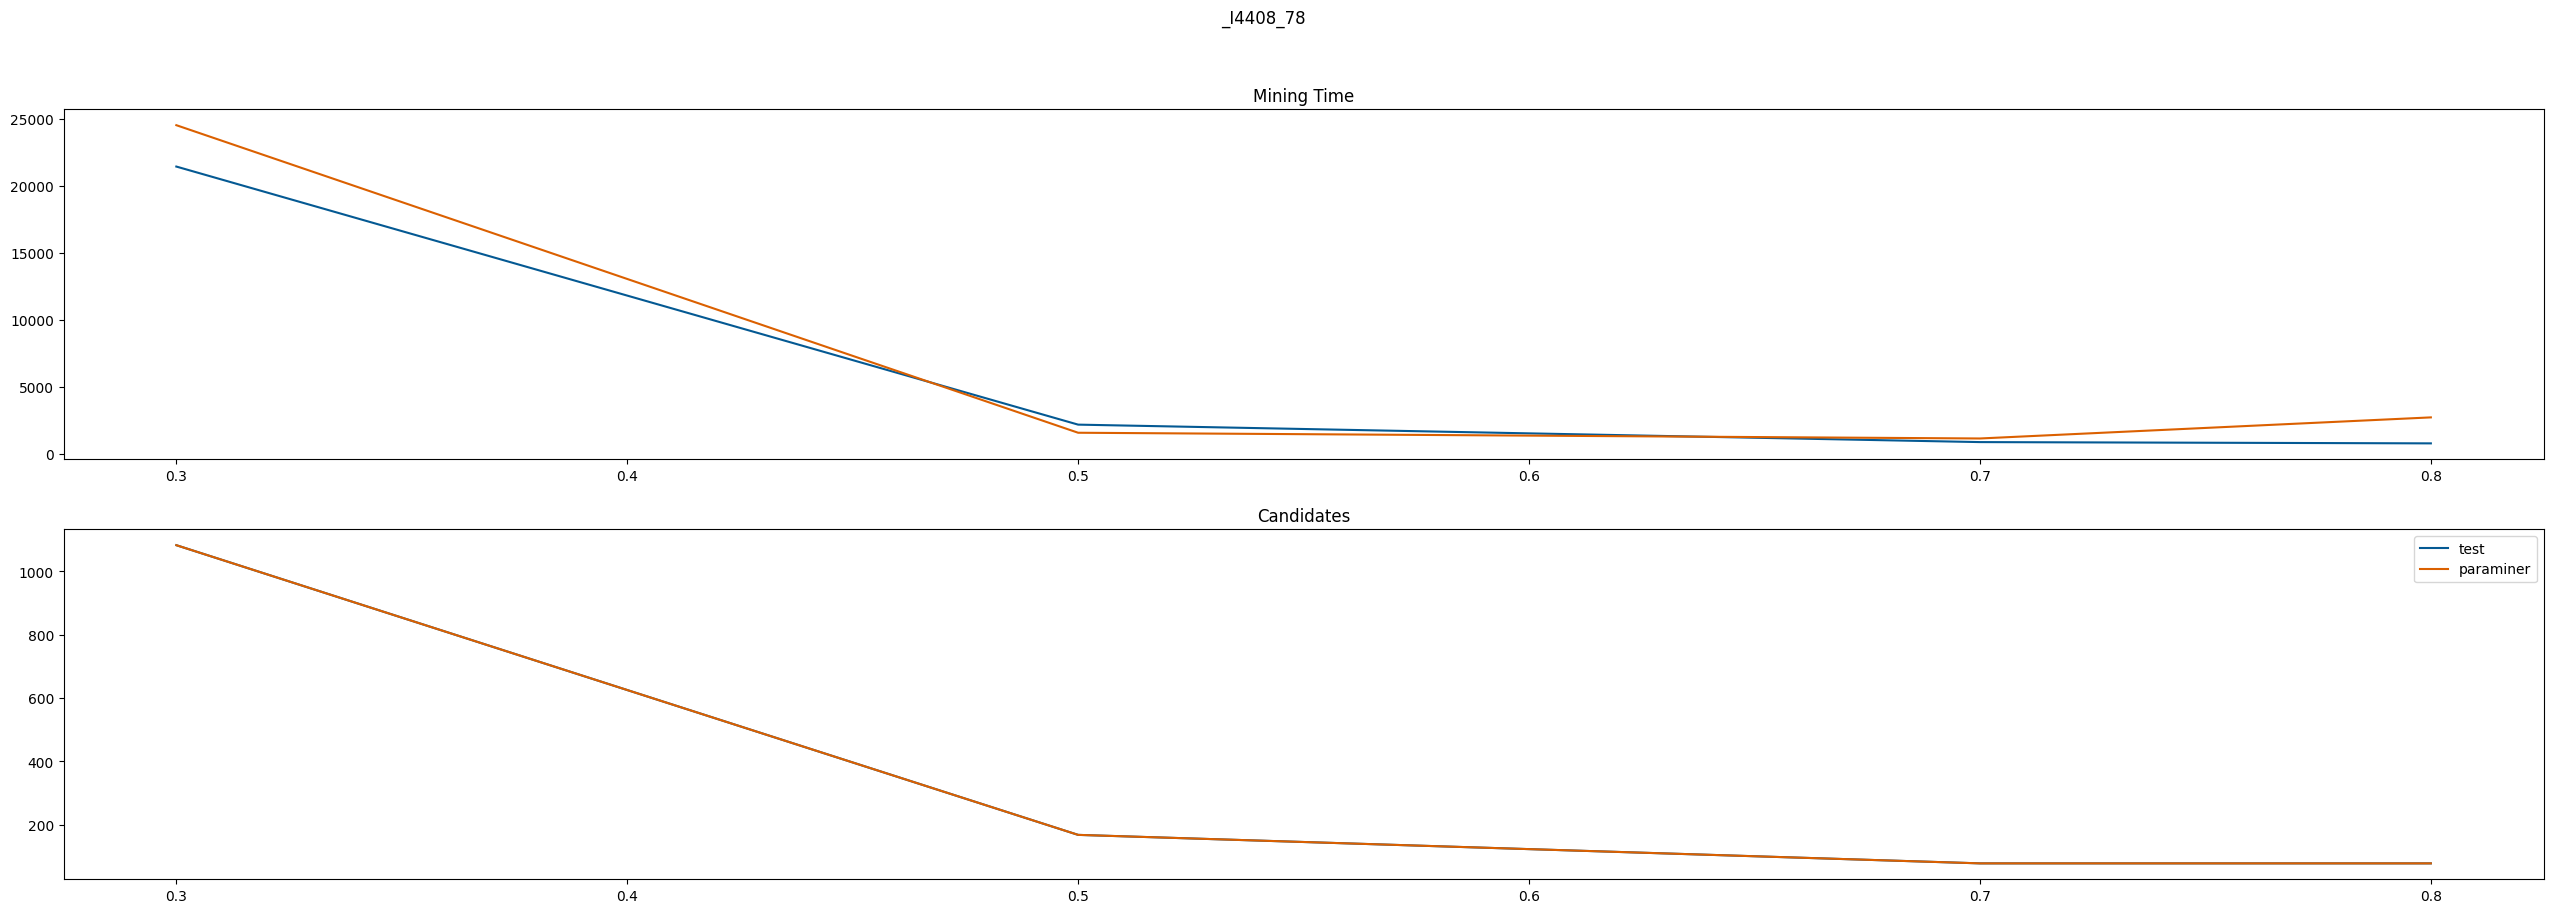

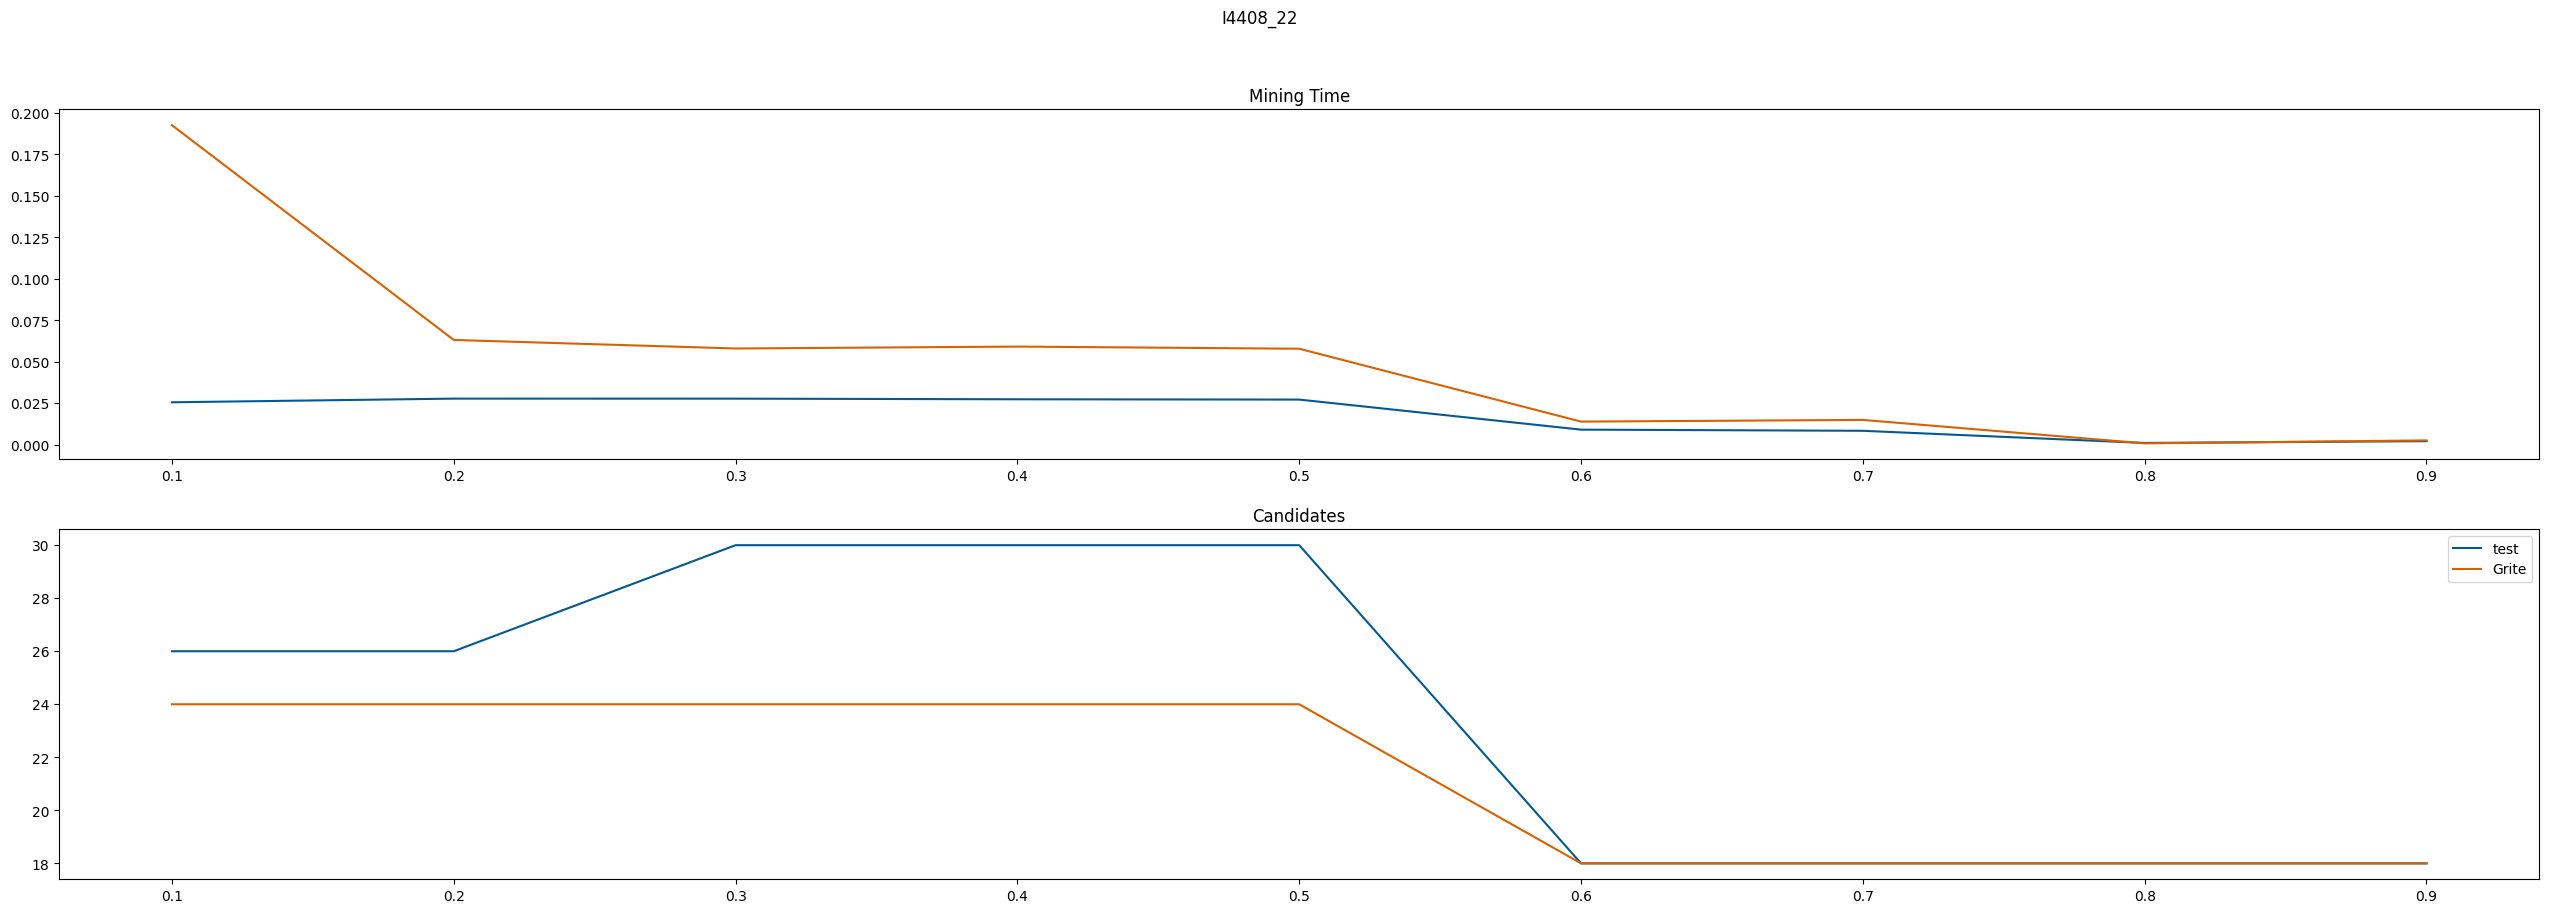

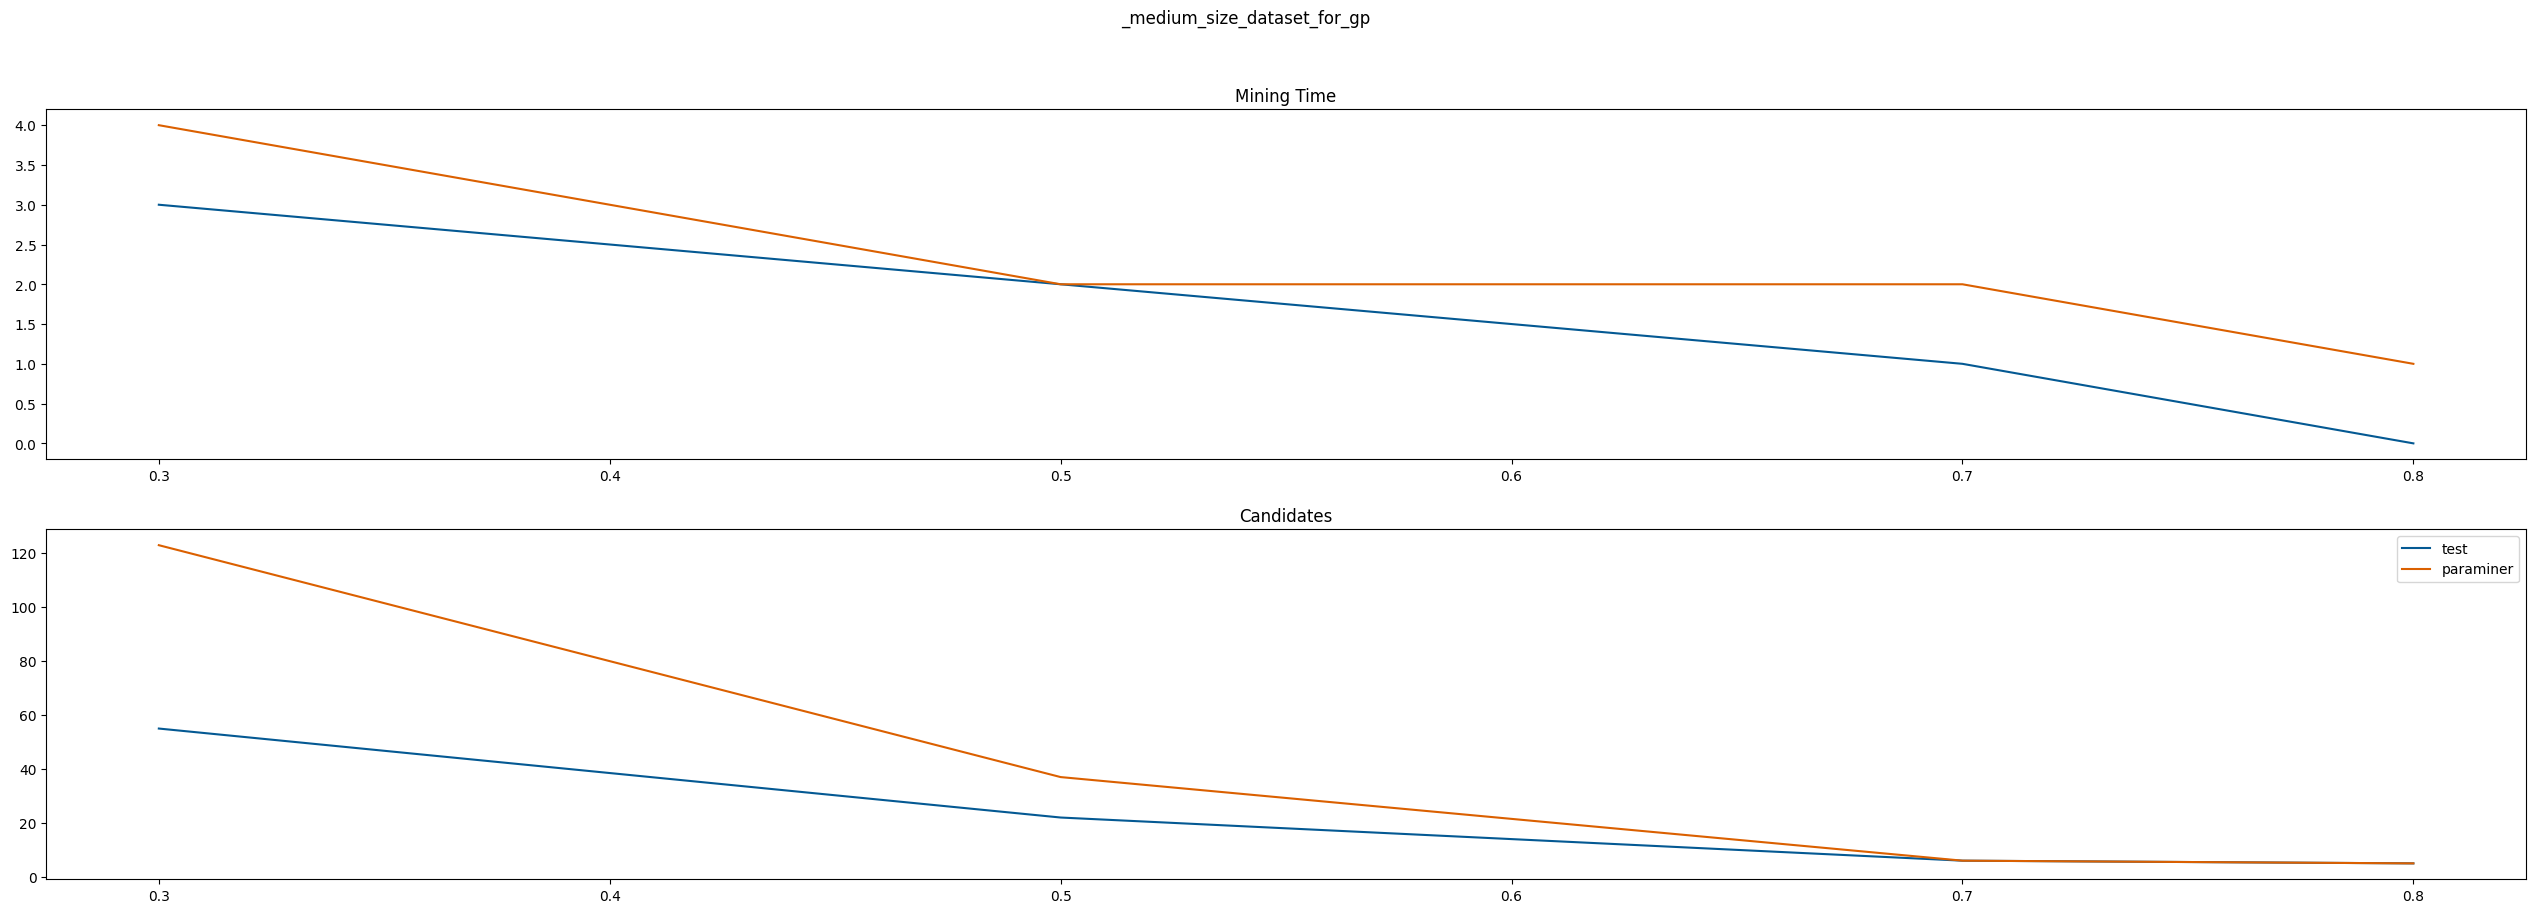

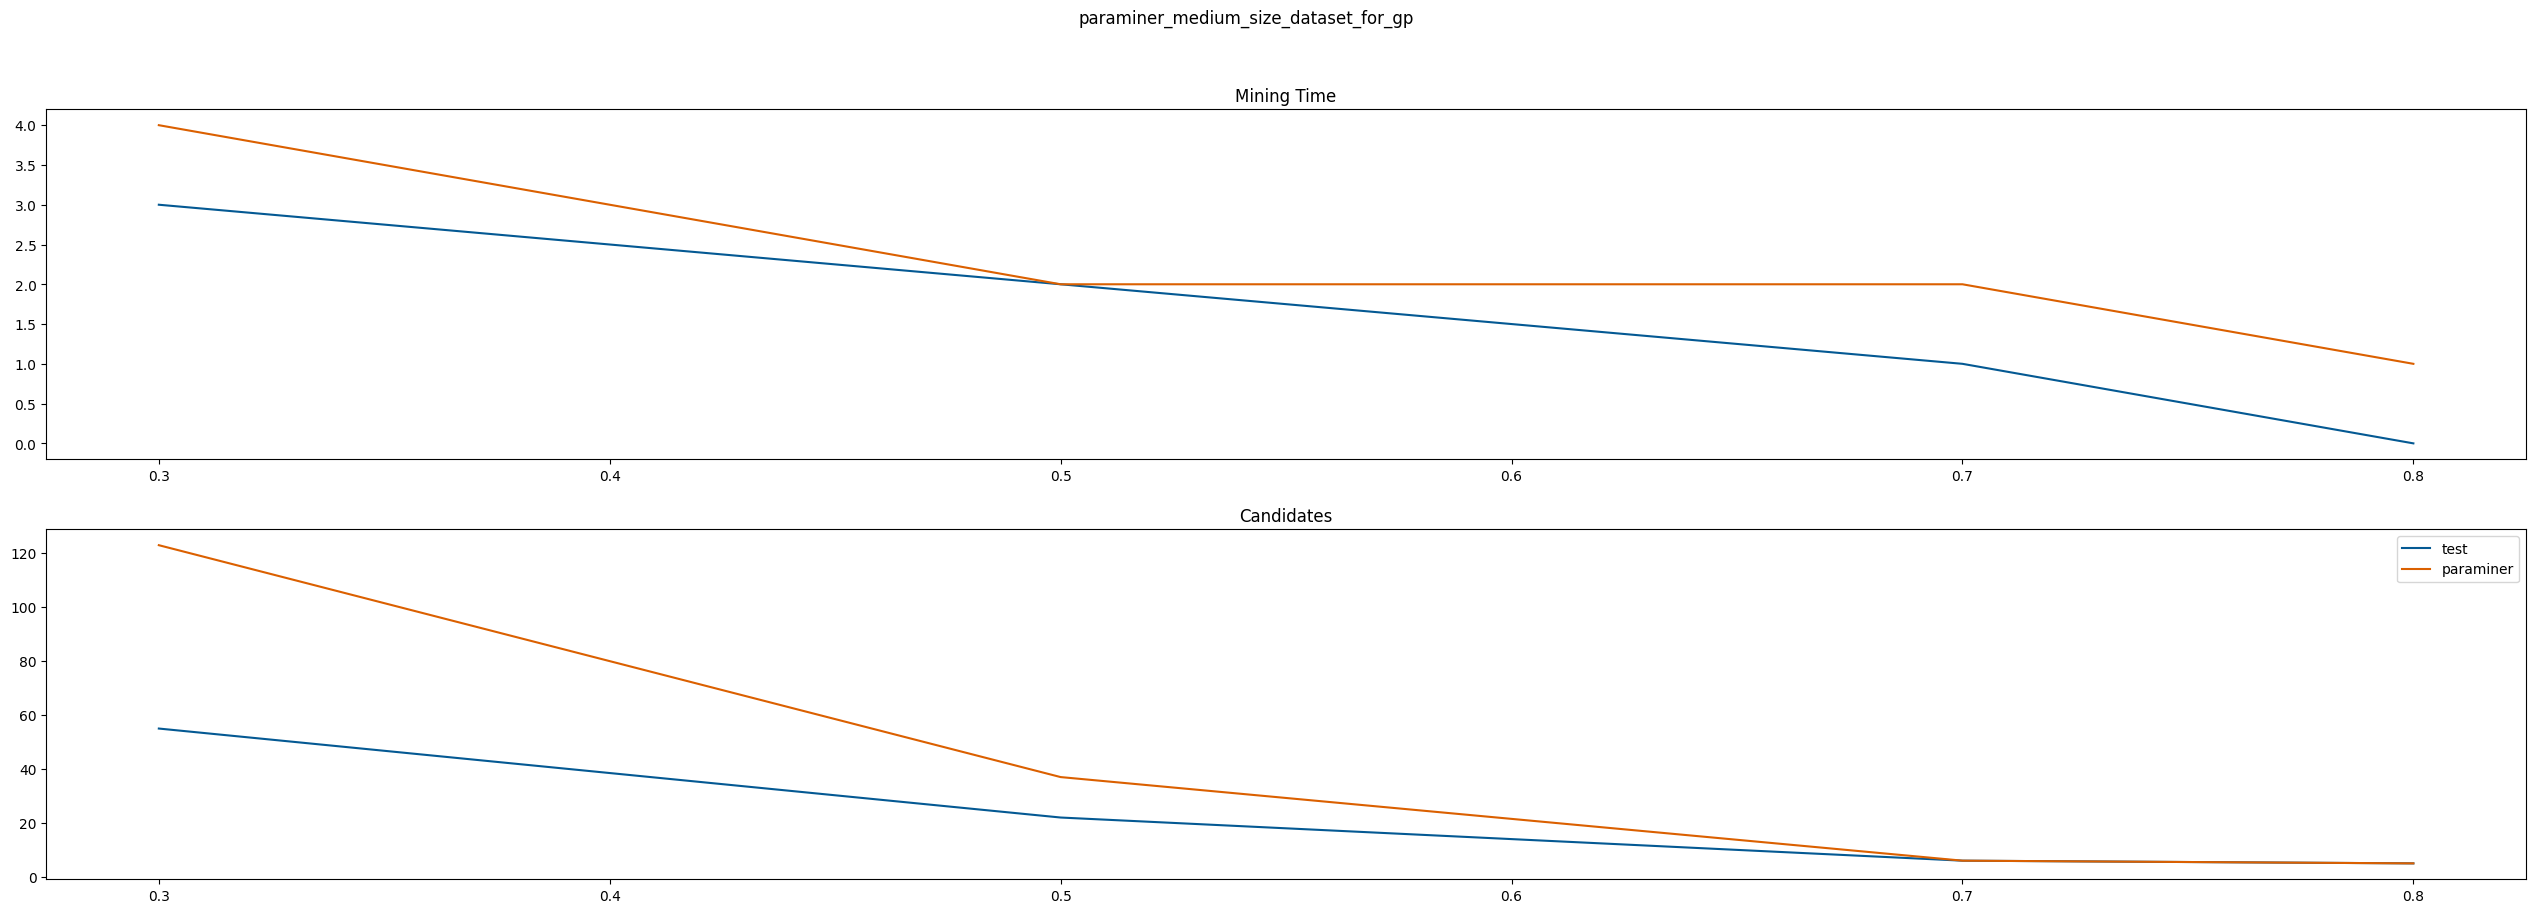

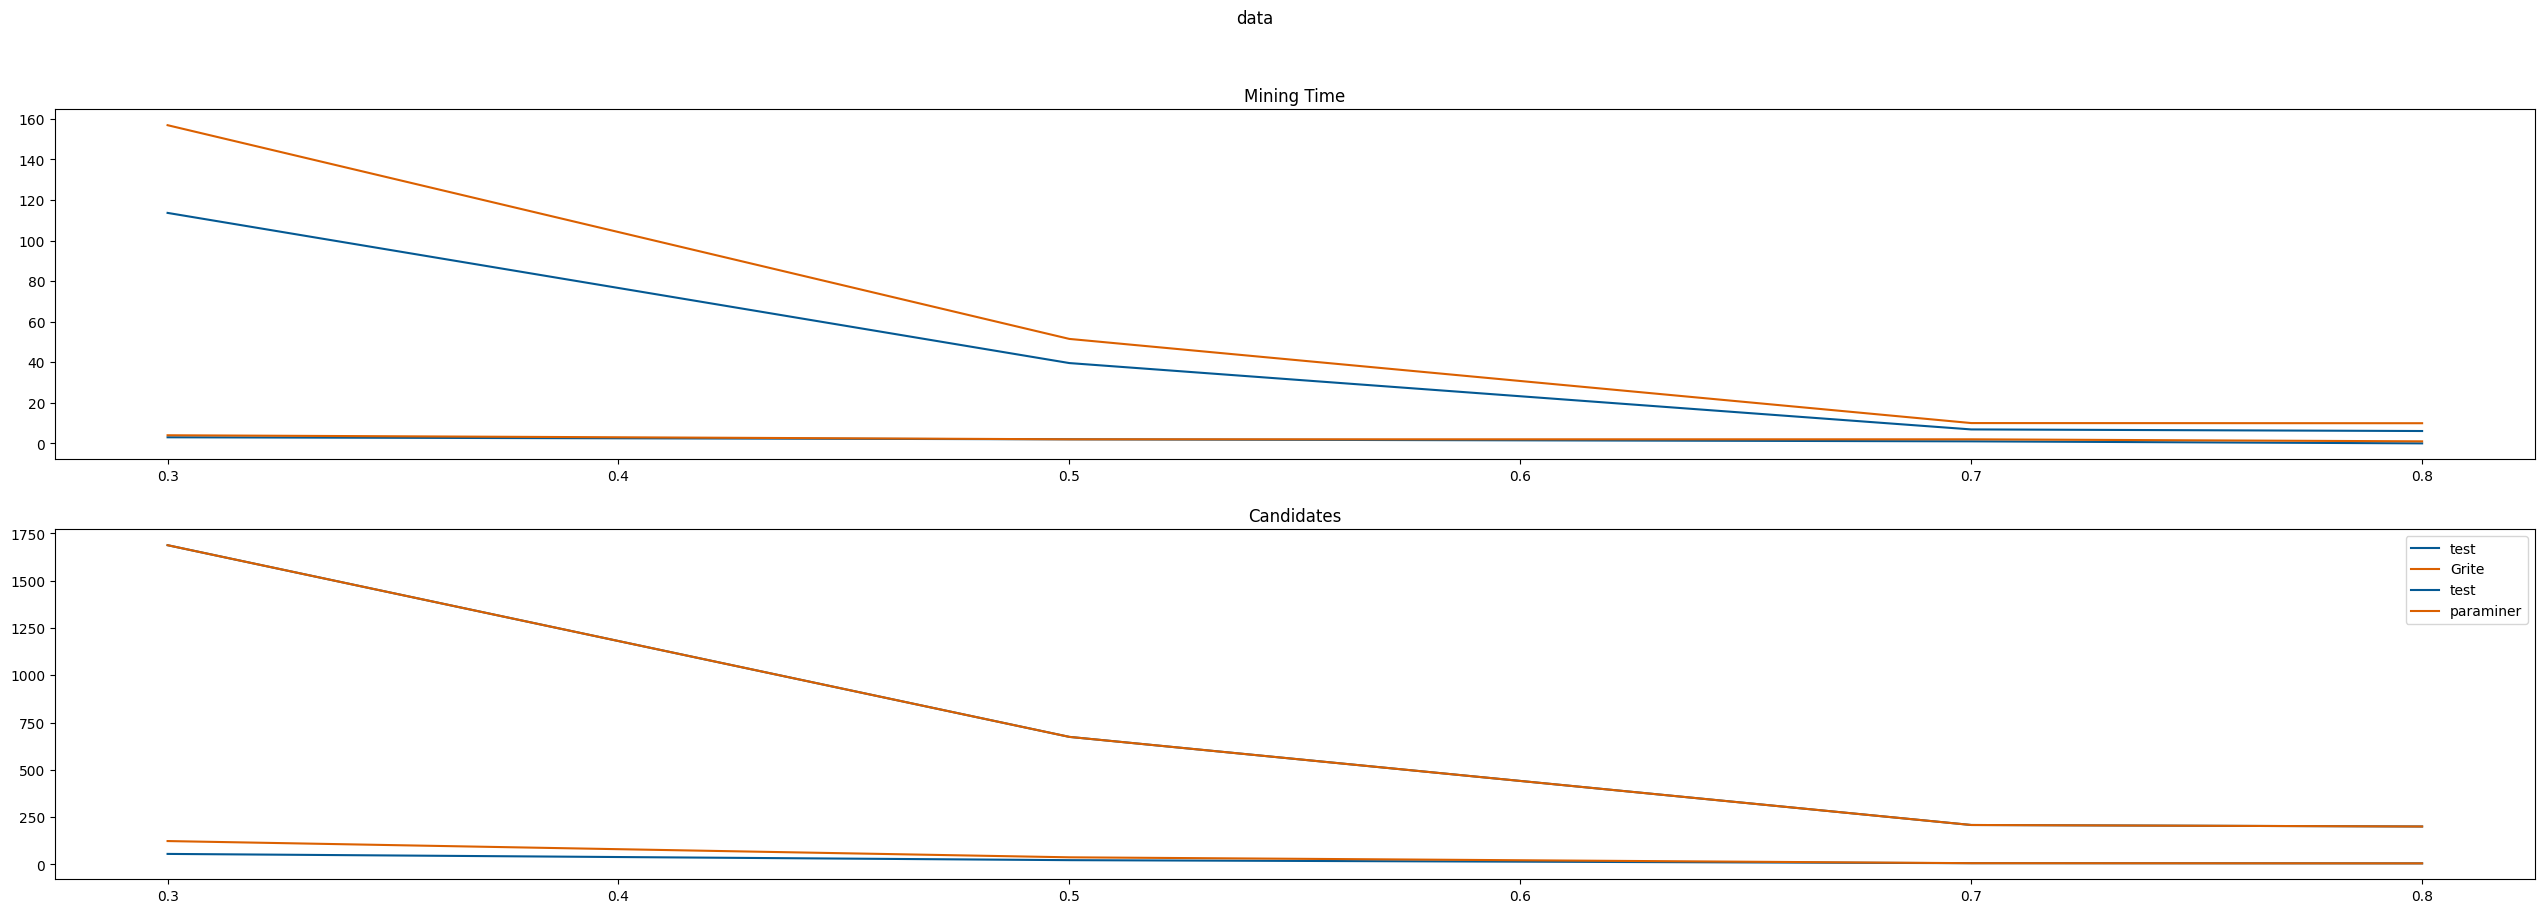

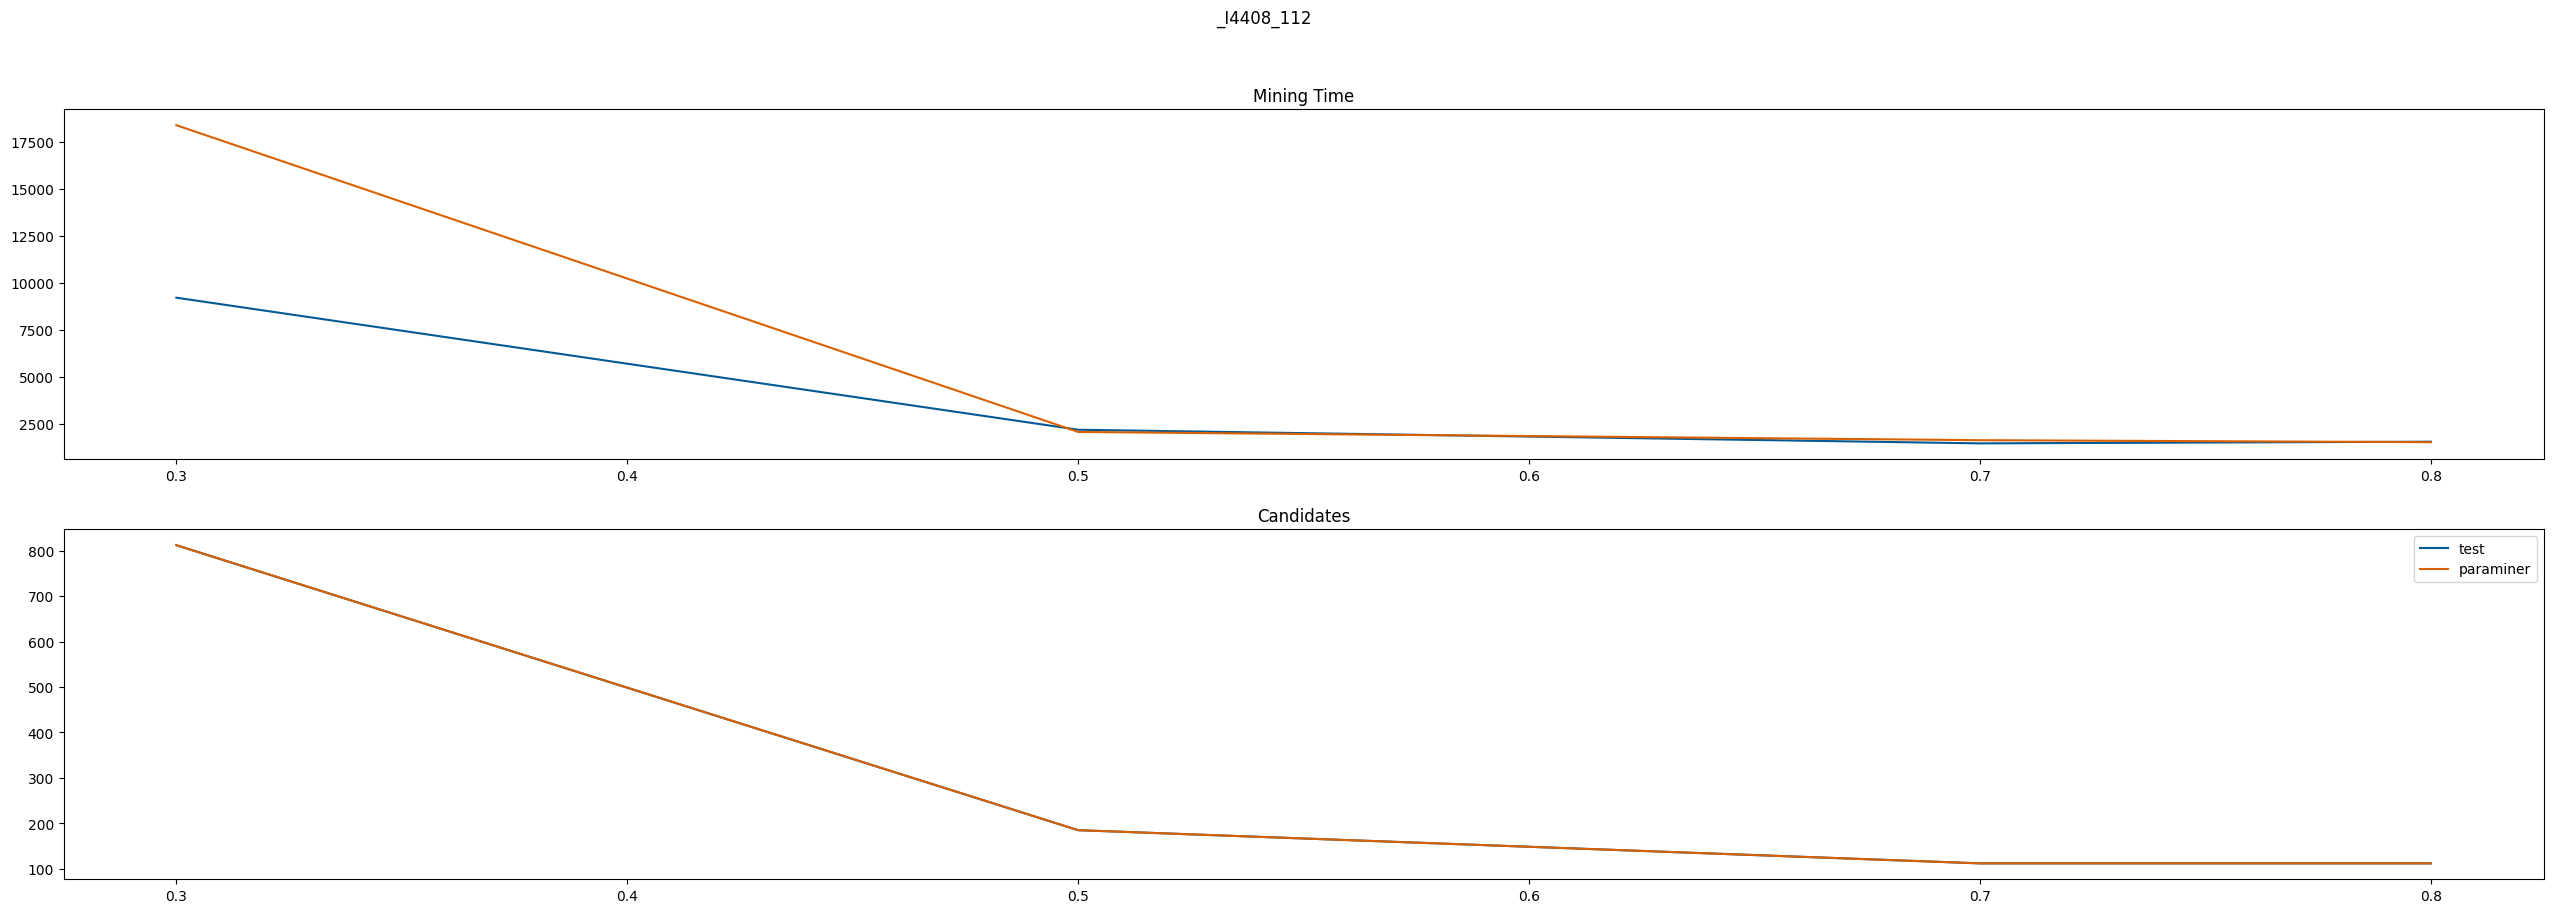

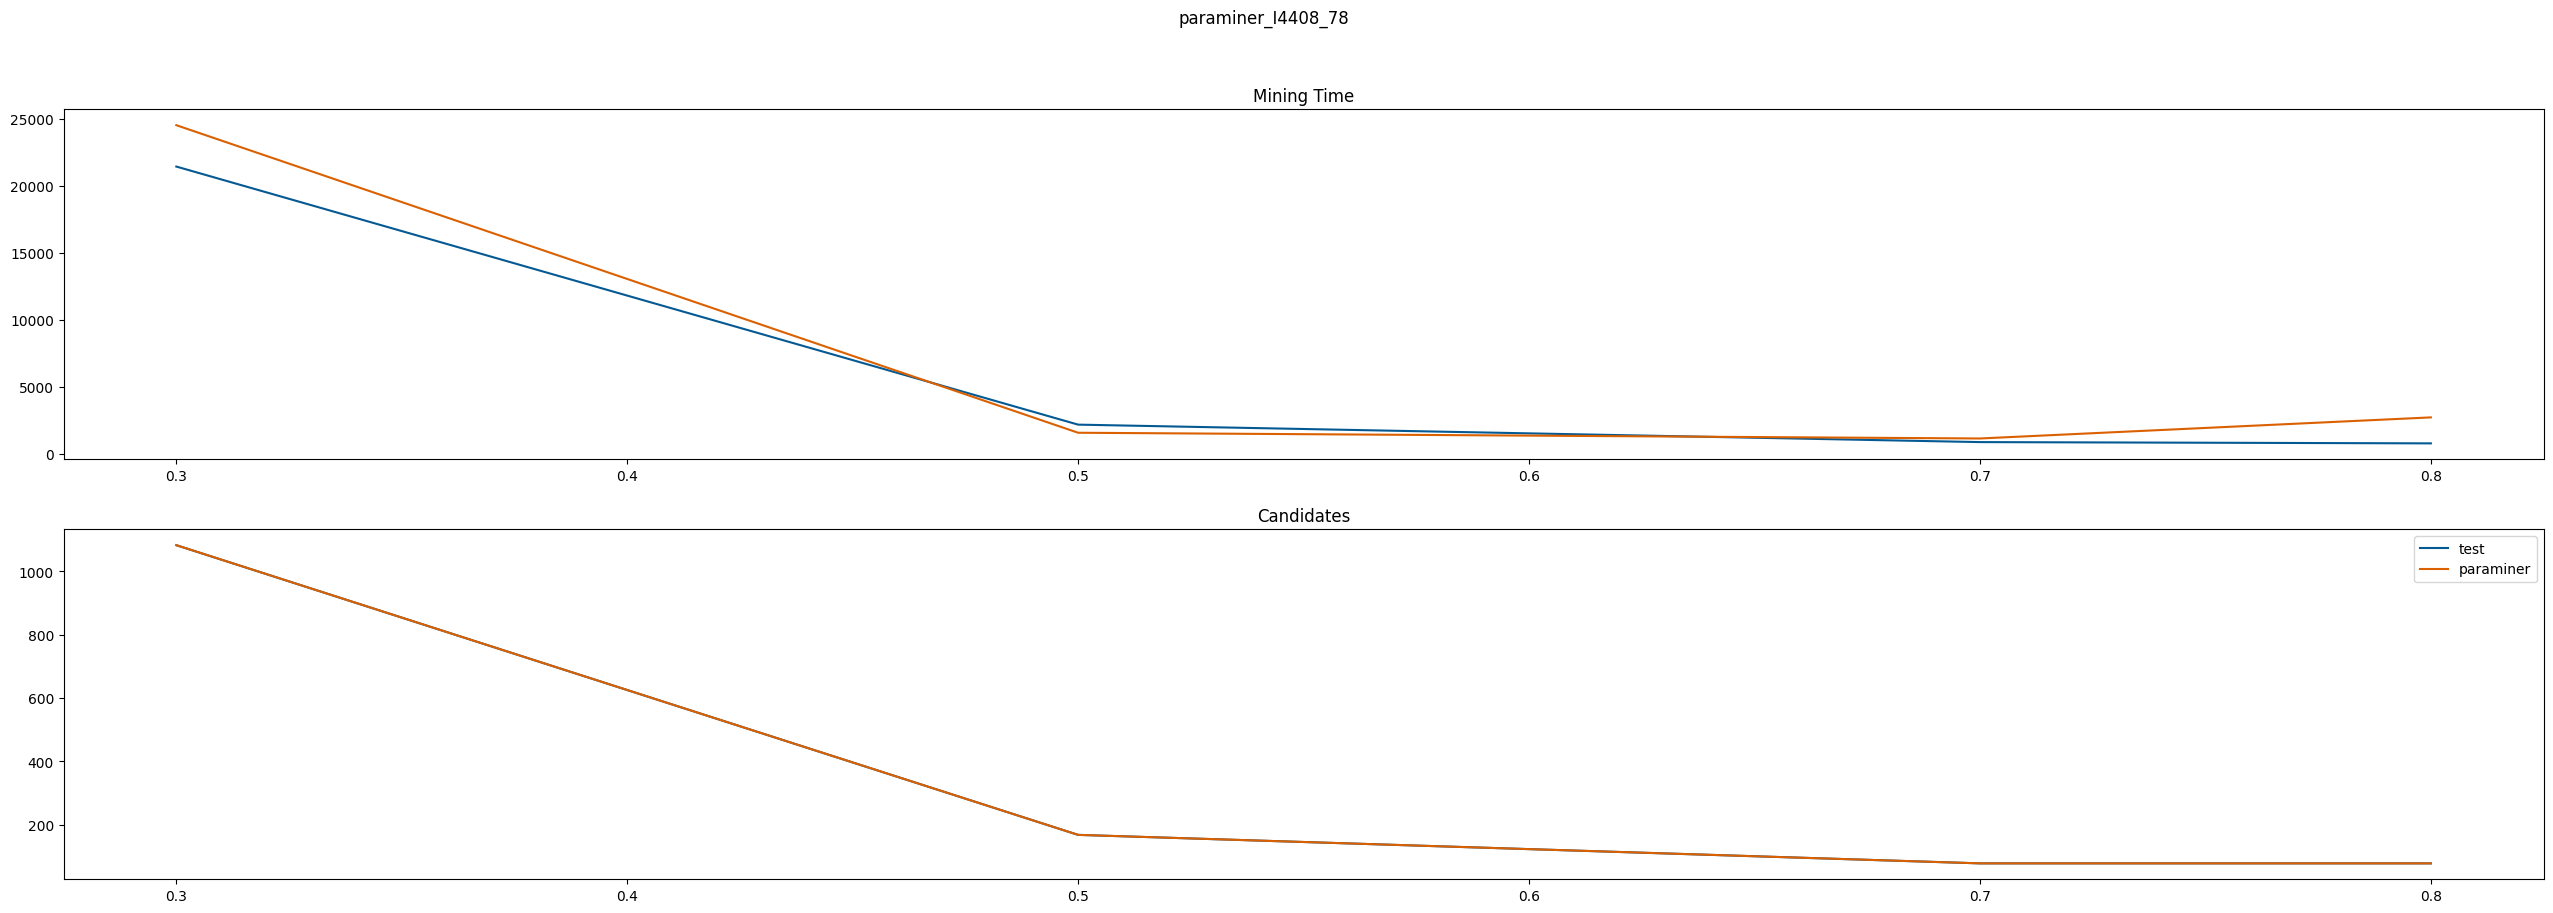

In [20]:
import glob
files = glob.glob("./new_result/*") + glob.glob("../paraminer/results/*")

percents = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
percents_2 = [0.3, 0.5, 0.7, 0.8]

data_names = set()
for file in files:
    if '.csv' in file:
        f_name = file.split('/')[-1].split('.')[0]
        if 'test_' in file:
            if 'paraminer' in file:
                data_names.add(f_name.replace('test_paraminer', ''))
            else:
                data_names.add(f_name.replace('test_', ''))
        else:
            data_names.add(f_name.replace('Grite_', ''))

for name in data_names:
    figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(32, 10))
    figure.suptitle(name)

    i = 0
    for filename in files:
        if name in filename:
            algo = filename.split('/')[-1].split('_')[0].split('/')[-1]
            df = pd.read_csv(filename)
            color = '#045993' if algo == 'test' else '#DB6000'
            candidate_column = 'candidates' if not 'paraminer' in filename else 'patterns'
            x_axis = percents if len(percents) == len(df[candidate_column]) else percents_2
            axes[0].grid()
            axes[1].grid()
            
            axes[0].plot(x_axis, df['time'], label=algo, color=color)
            axes[1].plot(x_axis, df[candidate_column], label=algo, color=color)

            axes[0].title.set_text('Mining Time')

            axes[1].title.set_text('Candidates')
    plt.legend()
    plt.show()

In [54]:
d = pd.read_csv('../../data/gri_data/meteo/F30Att100Li.dat', sep='\s+')
d.shape

(99, 30)

## Résultats paraminer

0    812
1    185
2    112
3    112
Name: patterns, dtype: int64
0    730
1    129
2     89
3    100
Name: patterns, dtype: int64


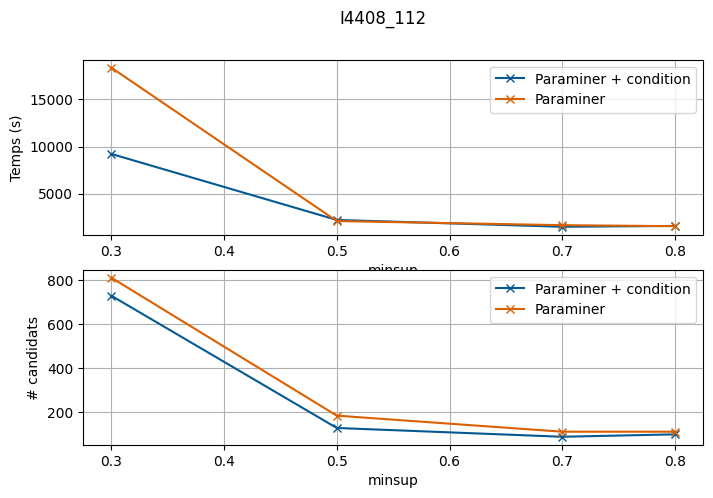

0    479
1     90
2     52
3     39
Name: patterns, dtype: int64
0    383
1     62
2     46
3     35
Name: patterns, dtype: int64


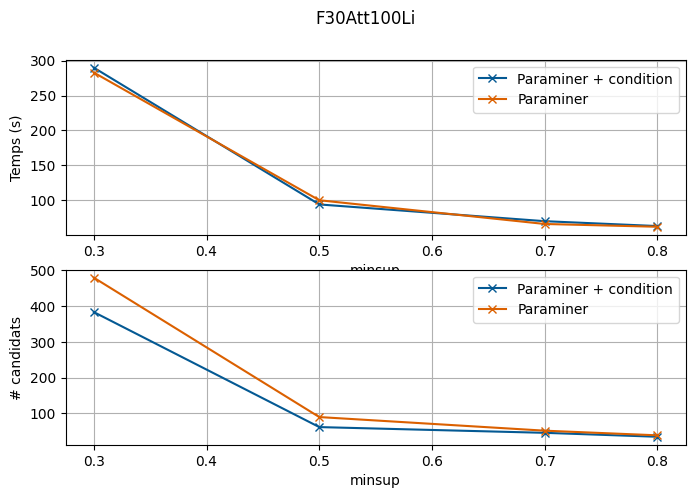

0    8
1    5
2    5
3    5
Name: patterns, dtype: int64
0    6
1    4
2    4
3    3
Name: patterns, dtype: int64


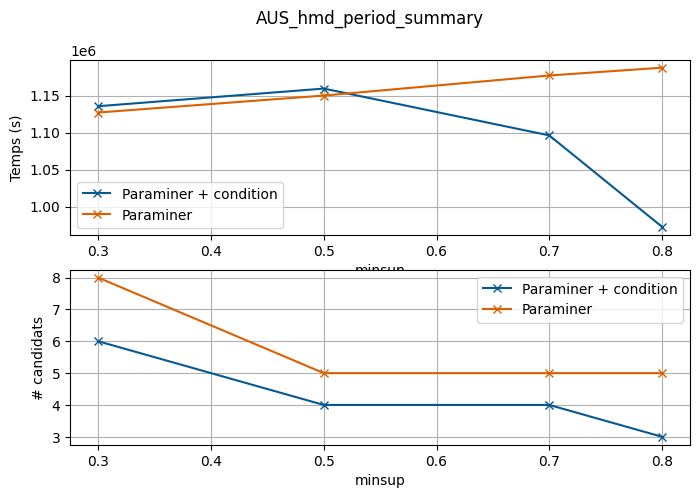

0    25
1    23
2    20
3    20
Name: patterns, dtype: int64
0    20
1    16
2    14
3    18
Name: patterns, dtype: int64


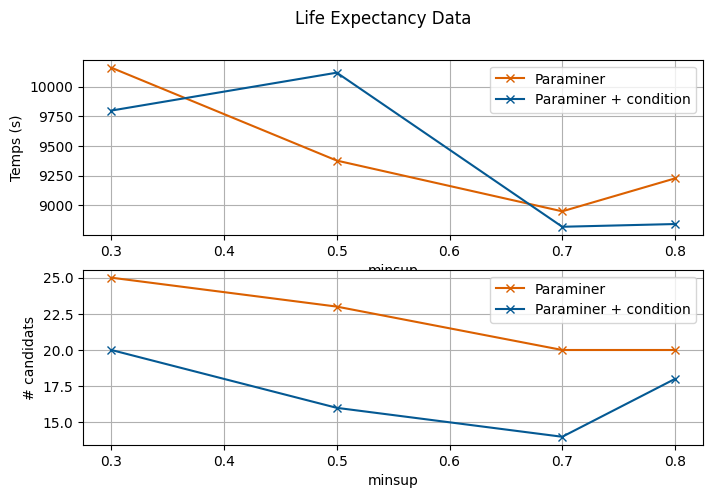

0   NaN
1   NaN
2   NaN
3   NaN
Name: patterns, dtype: float64


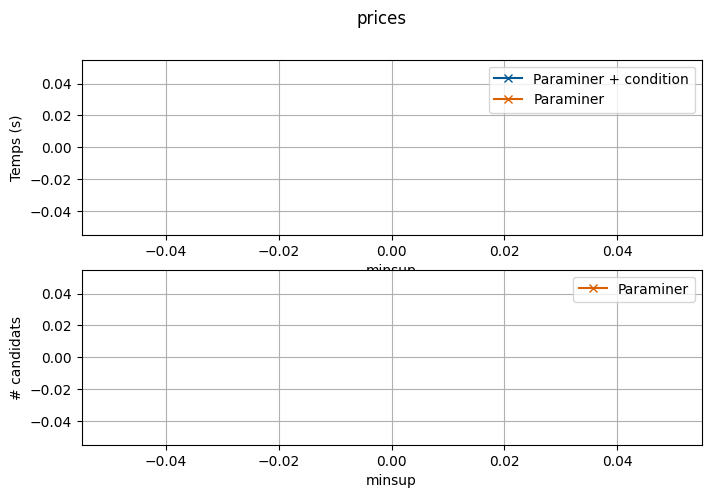

0    111
1     81
2     78
3     74
Name: patterns, dtype: int64
0    88
1    56
2    54
3    66
Name: patterns, dtype: int64


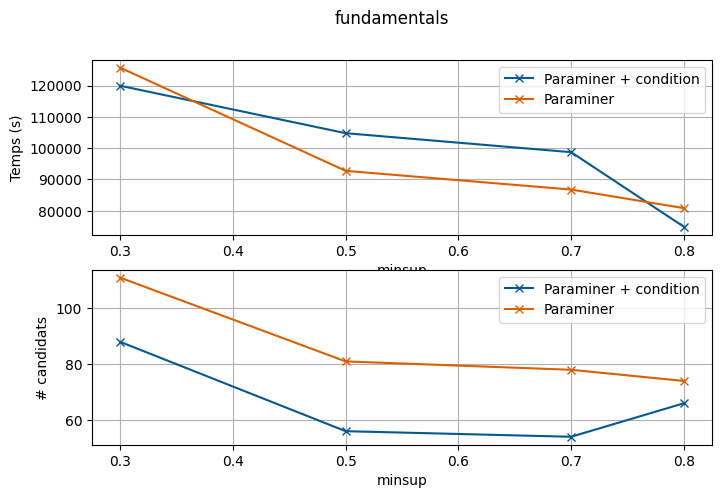

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


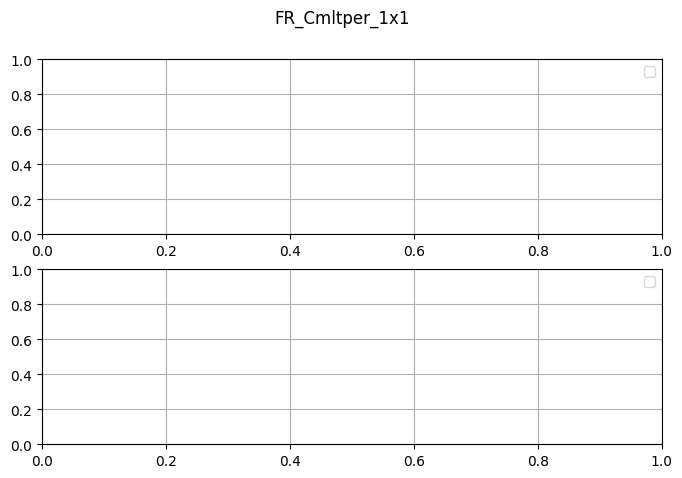

0    76
1    44
2    10
3     6
Name: patterns, dtype: int64
0    68
1    35
2     8
3     4
Name: patterns, dtype: int64


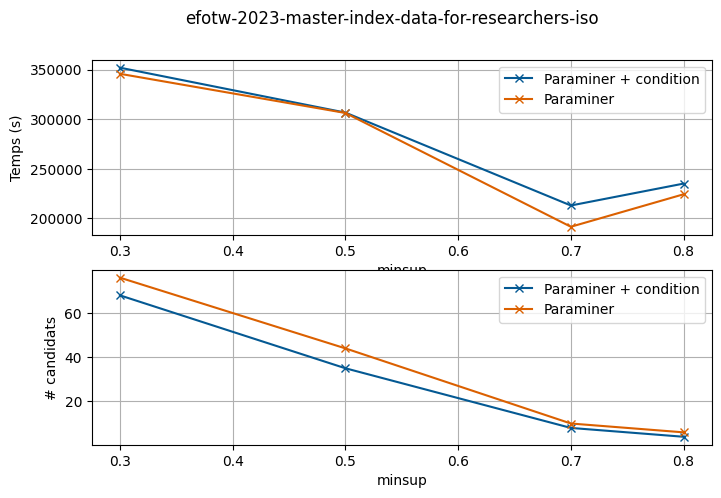

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


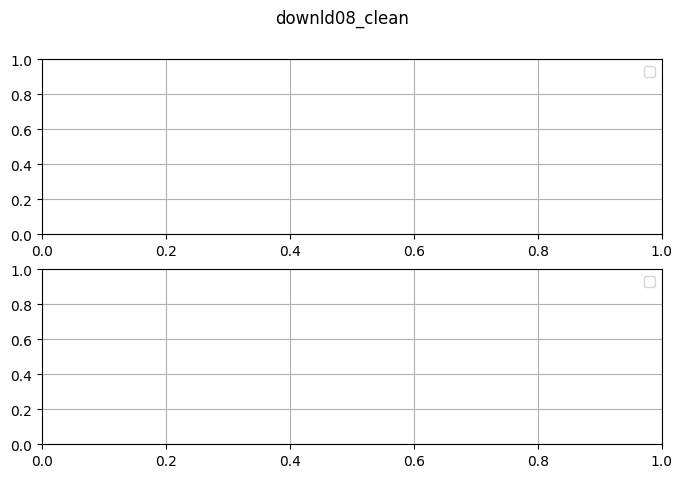

0    1083
1     168
2      78
3      78
Name: patterns, dtype: int64
0    974
1    151
2     70
3     54
Name: patterns, dtype: int64


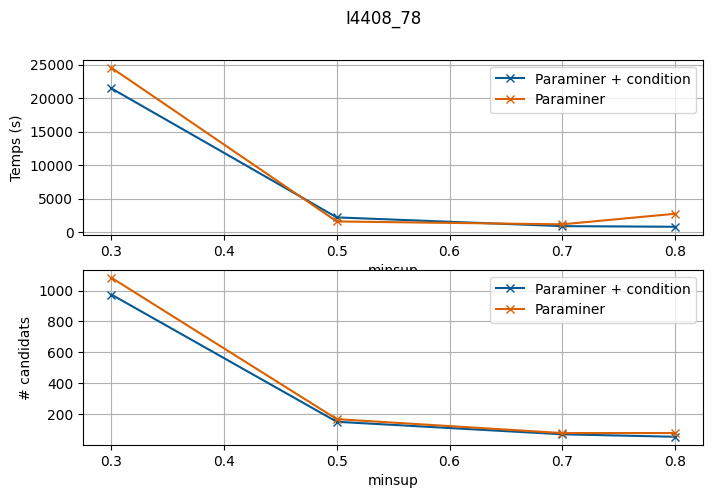

0    716
1    132
2     54
3     45
Name: patterns, dtype: int64
0    501
1    105
2     48
3     31
Name: patterns, dtype: int64


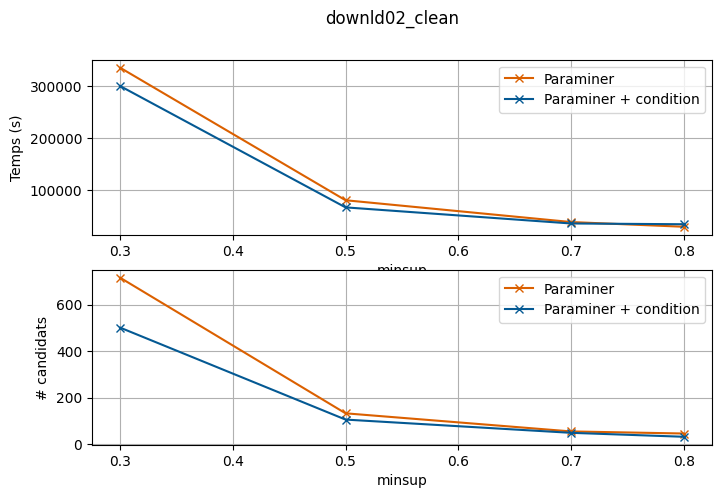

0    18
1    15
2    15
3    15
Name: patterns, dtype: int64
0    12
1    13
2    10
3    10
Name: patterns, dtype: int64


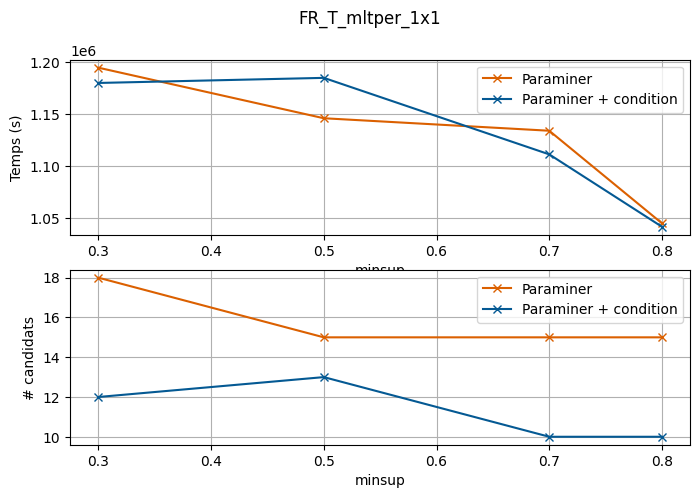

In [ ]:
import glob
import random
files = glob.glob("../paraminer/safe_results/*")

percents = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
percents_2 = [0.3, 0.5, 0.7, 0.8]

data_names = set()
for file in files:
    if '.csv' in file:
        f_name = file.split('/')[-1].split('.')[0]
        if 'test_paraminer' in file:
            data_names.add(f_name.replace('test_paraminer_', ''))
        else:
            data_names.add(f_name.replace('paraminer_', ''))

for name in data_names:
    figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))
    figure.suptitle(name)

    i = 0
    for filename in files:
        if name in filename:
            algo = filename.split('/')[-1].split('_')[0].split('/')[-1]
            if algo == "test":
                algo = "Paraminer + condition"
            else:
                algo = "Paraminer"

            df = pd.read_csv(filename)
            color = "#045993" if algo == "Paraminer + condition" else "#DB6000"
            candidate_column = 'candidates' if not 'paraminer' in filename else 'patterns'
            x_axis = percents if len(percents) == len(df[candidate_column]) else percents_2
            try:

                axes[0].plot(x_axis, df['time'], label=algo, color=color, marker='x')
                axes[0].set_ylabel("Temps (s)")
                axes[0].set_xlabel("minsup")

                axes[1].plot(x_axis, df[candidate_column], label=algo, color=color, marker="x")
                axes[1].set_ylabel("# candidats")
                axes[1].set_xlabel("minsup")
                axes.grid()

                axes[0].title.set_text('Temps d\'exécution')
                axes[1].title.set_text('Nombre de candidats générés')

            except:
                pass
    axes[0].grid()
    axes[1].grid()
    axes[0].legend()
    axes[1].legend()
    plt.legend()
    plt.show()
    bbox0 = axes[0].get_tightbbox(figure.canvas.get_renderer())
    bbox0_inches = bbox0.transformed(figure.dpi_scale_trans.inverted())
    figure.savefig(f"../images egc/time/paraminer_{name}.png", bbox_inches=bbox0_inches, dpi=300)

    # Save axes[1]
    bbox1 = axes[1].get_tightbbox(figure.canvas.get_renderer())
    bbox1_inches = bbox1.transformed(figure.dpi_scale_trans.inverted())
    figure.savefig(
        f"../images egc/candidats/paraminer_{name}.png", bbox_inches=bbox1_inches, dpi=300
    )
    # break
    # figure.savefig(f"../images egc/img/{name}.png")

In [16]:
pwd

'/home/kndb/Dev/Phd-Code/gradual/grite'